In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [3]:
df=pd.read_csv('train.csv',encoding='ISO_8859-1')
df

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action


In [4]:
df.shape

(54000, 4)

In [5]:
df.shape

(54000, 4)

In [6]:
df.columns

Index(['id', 'movie_name', 'synopsis', 'genre'], dtype='object')

In [7]:
df.dtypes

id             int64
movie_name    object
synopsis      object
genre         object
dtype: object

In [8]:
df.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [9]:
df.tail()

,id,movie_name,synopsis,genre
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action
53999,33970,Margo the Mouse,Margo is a little mouse that lives quietly in ...,family


In [10]:
df.isna().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [11]:
df['genre'].value_counts()

genre
fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='genre'>

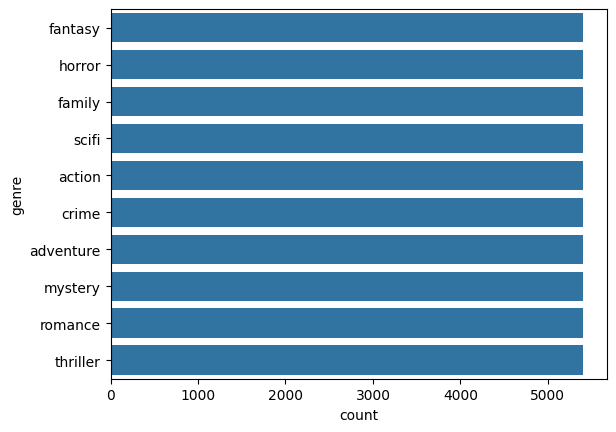

In [12]:
sns.countplot(df['genre'])

In [13]:
df.drop(['id','movie_name'],axis=1,inplace=True)

In [14]:

df['genre']=df['genre'].map({'fantasy':0,'horror': 1, 'family':2,
                             'scifi': 3,'action': 4,'crime':5,
                             'adventure':6,'mystery':7,'romance': 8,
                             'thriller': 9})

In [15]:
df

,synopsis,genre
0,A young scriptwriter starts bringing valuable ...,0
1,A director and her friends renting a haunted h...,1
2,This is an educational video for families and ...,2
3,Scientists working in the Austrian Alps discov...,3
4,Buy Day - Four Men Widely - Apart in Life - By...,4
...,...,...
53995,Two loser pest control buddies find themselves...,3
53996,A seductive woman gets involved in relationshi...,9
53997,"Duyen, a wedding dress staff, who decides to c...",8
53998,The people of a crowded colony in Coimbatore c...,4


In [16]:
synopsis=df.synopsis
synopsis

0        A young scriptwriter starts bringing valuable ...
1        A director and her friends renting a haunted h...
2        This is an educational video for families and ...
3        Scientists working in the Austrian Alps discov...
4        Buy Day - Four Men Widely - Apart in Life - By...
                               ...                        
53995    Two loser pest control buddies find themselves...
53996    A seductive woman gets involved in relationshi...
53997    Duyen, a wedding dress staff, who decides to c...
53998    The people of a crowded colony in Coimbatore c...
53999    Margo is a little mouse that lives quietly in ...
Name: synopsis, Length: 54000, dtype: object

In [17]:
#white space
synopsis=synopsis.str.replace(r'\s+',' ',regex=True).str.strip()
synopsis

0        A young scriptwriter starts bringing valuable ...
1        A director and her friends renting a haunted h...
2        This is an educational video for families and ...
3        Scientists working in the Austrian Alps discov...
4        Buy Day - Four Men Widely - Apart in Life - By...
                               ...                        
53995    Two loser pest control buddies find themselves...
53996    A seductive woman gets involved in relationshi...
53997    Duyen, a wedding dress staff, who decides to c...
53998    The people of a crowded colony in Coimbatore c...
53999    Margo is a little mouse that lives quietly in ...
Name: synopsis, Length: 54000, dtype: object

In [18]:
#tokenisation
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
synopsis=synopsis.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
synopsis

0        A young scriptwriter starts bringing valuable ...
1        A director and her friends renting a haunted h...
2        This is an educational video for families and ...
3        Scientists working in the Austrian Alps discov...
4        Buy Day - Four Men Widely - Apart in Life - By...
                               ...                        
53995    Two loser pest control buddies find themselves...
53996    A seductive woman gets involved in relationshi...
53997    Duyen , a wedding dress staff , who decides to...
53998    The people of a crowded colony in Coimbatore c...
53999    Margo is a little mouse that lives quietly in ...
Name: synopsis, Length: 54000, dtype: object

In [19]:
#removing special characters
synopsis=synopsis.str.replace('[^A-Za-z0-9]',' ',regex=True)
synopsis

0        A young scriptwriter starts bringing valuable ...
1        A director and her friends renting a haunted h...
2        This is an educational video for families and ...
3        Scientists working in the Austrian Alps discov...
4        Buy Day   Four Men Widely   Apart in Life   By...
                               ...                        
53995    Two loser pest control buddies find themselves...
53996    A seductive woman gets involved in relationshi...
53997    Duyen   a wedding dress staff   who decides to...
53998    The people of a crowded colony in Coimbatore c...
53999    Margo is a little mouse that lives quietly in ...
Name: synopsis, Length: 54000, dtype: object

In [20]:
#stemming
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
synopsis=synopsis.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
synopsis

0        a young scriptwrit start bring valuabl object ...
1        a director and her friend rent a haunt hous to...
2        this is an educ video for famili and famili th...
3        scientist work in the austrian alp discov that...
4        buy day four men wide apart in life by night s...
                               ...                        
53995    two loser pest control buddi find themselv bat...
53996    a seduct woman get involv in relationship with...
53997    duyen a wed dress staff who decid to continu a...
53998    the peopl of a crowd coloni in coimbator citi ...
53999    margo is a littl mous that live quiet in a tre...
Name: synopsis, Length: 54000, dtype: object

In [21]:
#stop words
from nltk.corpus import stopwords
sp=stopwords.words('english')
synopsis=synopsis.apply(lambda x:[i for i in tk.tokenize(x) if i not in sp]).apply(lambda x:' '.join(x))
synopsis

0        young scriptwrit start bring valuabl object ba...
1        director friend rent haunt hous captur paranor...
2        educ video famili famili therapist describ beh...
3        scientist work austrian alp discov glacier lea...
4        buy day four men wide apart life night shadow ...
                               ...                        
53995    two loser pest control buddi find themselv bat...
53996    seduct woman get involv relationship sever peo...
53997    duyen wed dress staff decid continu pregnanc d...
53998    peopl crowd coloni coimbator citi go hard time...
53999    margo littl mous live quiet tree hous life tre...
Name: synopsis, Length: 54000, dtype: object

In [22]:
#vectorisation-convering to nymerical form
from sklearn.feature_extraction.text import TfidfVectorizer
vd=TfidfVectorizer(max_features=5000)
data=vd.fit_transform(synopsis)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 717669 stored elements and shape (54000, 5000)>

In [23]:
y=df['genre'].values
y

array([0, 1, 2, ..., 8, 4, 2], shape=(54000,))

In [24]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=1)

In [25]:
#model creation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.29      0.30      1583
           1       0.43      0.44      0.44      1638
           2       0.39      0.45      0.42      1589
           3       0.41      0.47      0.43      1634
           4       0.29      0.26      0.27      1596
           5       0.34      0.36      0.35      1612
           6       0.27      0.23      0.25      1657
           7       0.29      0.29      0.29      1607
           8       0.47      0.56      0.51      1677
           9       0.21      0.15      0.18      1607

    accuracy                           0.35     16200
   macro avg       0.34      0.35      0.34     16200
weighted avg       0.34      0.35      0.34     16200



In [27]:
new_plot = ["A group of astronauts explore an unknown planet and encounter alien life."]
X_new = vd.transform(new_plot)


In [28]:
genre_map={'fantasy':0,'horror': 1, 'family':2,
                             'scifi': 3,'action': 4,'crime':5,
                             'adventure':6,'mystery':7,'romance': 8,
                             'thriller': 9}


In [29]:
# 🔁 Invert the dictionary for prediction
inv_genre_map = {v: k for k, v in genre_map.items()}

In [30]:
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(X_new)[0]
    top3 = probs.argsort()[-3:][::-1]
    for i in top3:
        print(f"{inv_genre_map[i]}: {probs[i]:.2f}")


scifi: 0.85
adventure: 0.05
fantasy: 0.03


In [31]:
import joblib

# Save your model, vectorizer, and label map
joblib.dump(model, 'genre_model.pkl',compress=5)
joblib.dump(vd, 'vectorizer.pkl')
joblib.dump(genre_map, 'genre_map.pkl')  # {0:'action', 1:'drama', ...}


['genre_map.pkl']